In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geocoder
from time import sleep

In [2]:
from scipy.optimize import fmin, fmin_bfgs

In [3]:
import seaborn as sns
sns.set(style="ticks", palette="Set2")

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
pwd

'/Users/mmngreco/Documents/repos/unizar/SIAD/Trabajo Grupo'

In [5]:
%matplotlib inline

# PROBLEMA 

## $\min_{x_0, y_0}{\sum{c_i · w_i · d_i}}$

## $d_i = \sqrt{(x_i - x_0)^2 + (y_i - x_0)^2}$

__DONDE:__

- $c_i$: Coste ¿unitario?.
- $w_i$: Unidades demandadas de bienes (media de los últimos 3 años)
- $d_i$: Distancia al almacén.
- $x_i$: Coordenada eje x (Longitud)
- $y_i$: Coordenada eje y (Latitud)

__Variables de decisión:__ $x_0, y_0$ 

In [6]:
def func_obj(xy0):
    'Función Obejtivo, xy0: Tupla, pares de coordenadas'
    return sum(wi * ci * di(xy0))
    

# SIMULACIÓN

## DEMANDA (CLIENTES)

### SERIE TEMPORAL TIPO:

### $y_t = \delta_0 + \delta_1 · t + u_t$

### Donde:
- $y_t$ : Ventas para cada período t.
- $\delta_0$ : Ventas indendientes o autónomas. (Stock de Seguridad pe.)
- $\delta_1$ : Pendiente la recta.
- $u_t$ : Ruido ~ N(0, 5)

En este caso para darle más realismo, $\delta_0 = \delta_a + \delta_b · sin(x)$, de esta forma introducimos un posible componente estacional, que depende cuán grande sea $\delta_b$.

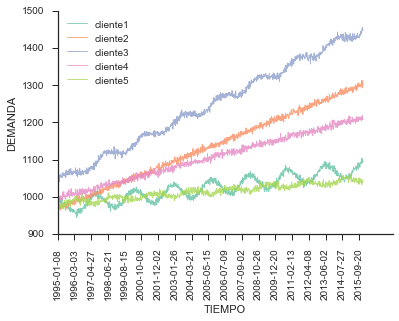

In [7]:
clientes = dict()
days_by_year = 365
nperiodos = 3 * days_by_year
tiempo = np.linspace(0 , 50, nperiodos)

for c in range(5):

    pendiente = np.random.uniform(0.5, 10)
    ruido = np.random.normal(0, 5, nperiodos)
    freq = np.random.normal(10, 10)
    demanda_a = np.random.normal(1000, 30)
    band = np.random.uniform() < 0.4
    demanda = demanda_a + (np.cos(tiempo)*band + np.sin(tiempo)*(1-band)) * freq + pendiente * tiempo + ruido
    cname = 'cliente%s' % (c+1)
    clientes[cname] = demanda

    plt.plot(demanda, alpha=0.8, label=cname, linewidth=0.91)

sns.despine()
plt.legend(loc=2)
tlabel = pd.date_range(end='2015-12-31', periods=nperiodos, freq='W')
plt.xlabel('TIEMPO')
plt.xticks(range(0, len(tiempo), 60), [t.date() for t in tlabel[0::60]], rotation=90)
plt.ylabel('DEMANDA')

In [8]:
ventas = pd.DataFrame.from_dict(clientes)

In [9]:
ventas.index = tlabel

In [10]:
ventas.head()

,cliente1,cliente2,cliente3,cliente4,cliente5
1995-01-08,996.403107,972.963345,1035.213053,995.270655,971.667725
1995-01-15,992.493469,965.703708,1049.694239,991.341663,972.620067
1995-01-22,999.460010,970.647863,1051.293550,993.323580,990.211528
1995-01-29,995.816069,973.450530,1045.547548,1003.573084,977.665916
1995-02-05,984.701552,972.877689,1049.461719,986.861528,975.899161


In [11]:
path = 'Documents/repos/unizar/SIAD/Trabajo Grupo/'
data_clientes = pd.read_csv('clientes_xys.csv', index_col=0)

In [12]:
data_clientes

,prov,lat,lng
cliente1,zaragoza,41.648823,-0.889085
cliente2,oviedo,43.361915,-5.849389
cliente3,huesca,42.131845,-0.407806
cliente4,madrid,40.416775,-3.703790
cliente5,bilbao,43.263013,-2.934985


In [13]:
yi = data_clientes.lat.values
xi = data_clientes.lng.values

In [14]:
list(xi)

[-0.88908530000000008,
 -5.8493887000000004,
 -0.4078058,
 -3.7037902000000003,
 -2.9349852000000003]

## COSTES

$c_i$: Es el coste por unidad de producto vendida.

Suponemos que esta empresa ya maximiza beneficios y los precios son exógenos. Por tanto la oferta igual a la demanda, siendo ésta última estimada como la media de los últimos 3 años.

$w_i$ = $E(w_i|T)$

In [15]:
wi = ventas.mean()
ci = np.random.uniform(1, 100) + 1
di = lambda xy0: np.sqrt((xi-xy0[0]) ** 2 + (yi-xy0[1]) ** 2)

In [16]:
wi

cliente1    1024.172749
cliente2    1135.056829
cliente3    1245.956499
cliente4    1104.880667
cliente5    1014.528371
dtype: float64

# OPTIMIZACIÓN

In [17]:
res = fmin(func_obj, [0,0])

Optimization terminated successfully.
         Current function value: 513841.236602
         Iterations: 100
         Function evaluations: 194


In [18]:
res

array([ -2.37258503,  42.18437587])

# RESULTADO

Con los datos simulados, la solución óptima para el problema planteado es [ 42.23885306,  -2.5716388 ], y la función toma el valor 934296.653775.

In [19]:
file_name = 'xys_backup.csv'
file_name_new = 'pais_ca_prov_rejilla.csv'

In [20]:
muestra_xys = pd.read_csv(file_name_new)
muestra_xys.drop_duplicates(inplace=True)

In [21]:
muestra_xys.head()

,pais,ca,prov,lat,lng
0,PT,Setúbal,Grândola,38.180107,-8.71207
1,PT,Setúbal,Grândola,38.180107,-8.41926
2,PT,Faro,Silves,37.277379,-8.41926
3,PT,Bragança,Mogadouro,41.249382,-6.66240
4,PT,Bragança,Mogadouro,41.429927,-6.66240


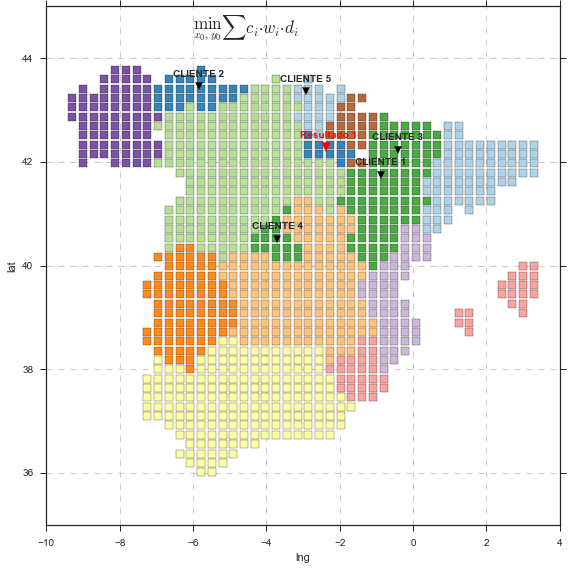

In [22]:
plt.figure(figsize=(8,8))
ax = plt.subplot(1,1,1)

color = sns.color_palette("Paired", 17)

n_color = list(map(int,'9  7 15 14 12 16 10  1  6  8 11 13  0  2  3  4  5'.split()))

# TERRITORIO
for i, region in enumerate(muestra_xys[muestra_xys.pais == 'ES'].ca.unique()):
    i = n_color[i]
    muestra_xys[muestra_xys.ca == region].plot(kind='scatter', 
                                               x='lng', 
                                               y='lat', 
                                               alpha=0.9, 
                                               ax=ax, 
                                               color=color[i], 
                                               marker='s',
                                               linewidths=.3,
                                               s=80)
# CLIENTES
for i, (y, x) in enumerate(zip(data_clientes.lat.values, data_clientes.lng.values)):

    plt.scatter(x, y*1.0025, color='black', marker='v', s=50)
    plt.text(x - 0.7,
             y + 0.3,
             'CLIENTE %s' % (i+1), weight='bold')

# RESULTADO
plt.scatter(res[0], res[1]*1.0025, color='red', marker='v', s=80)
plt.text(res[0] - 0.7, 
         res[1] + 0.3, 
         'Resultado 1',
         weight='bold',
         color='red')


plt.text(-6, 44.5, '$\min_{x_0,y_0}{\sum{c_i·w_i·d_i}}$', weight='bold', fontsize=17)

plt.xlim(-10,4)
ax.grid(True, linestyle='--')
plt.tight_layout()
plt.tight_layout()


> __NOTA:__ 
En los mapas físicos, las coordenadas están expresadas en grados, por ejemplo Puerto Rico sería: 18°14’70” N  66°29’68” W
Para convertir:
- $(18°14'70" N) = (18 + (14 / 60) + (70 / 3600)) = 18.252$
- $(66°29'68" W) = -(66 + (29 / 60) + (68 / 3600)) = -66.8627$

> La longitud se multiplica por __negativo__, porque está a la __izquierda (oeste)__ del punto 0,0.

# RESTRICCIÓN ADICIONAL

Al problema anterior, le agregamos una restricción adicional de tipo geográfica. Cada comunidad autónoma pasará a cobrar un impuesto por unidad vendida, el tipo impositivo dependerá de la comunidad autónoma, de forma que es probable que la elección óptima cambie.

Es decir:

# PROBLEMA INICIAL + RESTRICCIÓN

## $\min_{x_0, y_0}{\sum{c_i(1+t_i) · w_i · d_i}}$

__DONDE:__

- $c_i$: Coste unitario.
- $w_i$: Unidades demandadas de bienes (media de los últimos 3 años).
- $d_i$: Distancia al almacén.
- $x_i$: Coordenada eje x (Longitud).
- $y_i$: Coordenada eje y (Latitud).
- __$t_i$: Impuesto por unidad vendida.__

__Variables de decisión (Coordenadas):__ $x_0, y_0$ 


In [23]:
muestra_xys.head()

,pais,ca,prov,lat,lng
0,PT,Setúbal,Grândola,38.180107,-8.71207
1,PT,Setúbal,Grândola,38.180107,-8.41926
2,PT,Faro,Silves,37.277379,-8.41926
3,PT,Bragança,Mogadouro,41.249382,-6.66240
4,PT,Bragança,Mogadouro,41.429927,-6.66240


In [24]:
data_ca = muestra_xys[muestra_xys.pais == 'ES'].ca.unique()

# UNIFICAR LOS NOMBRES DE LAS CCAA

In [25]:
data_ca

array(['GA', 'EX', 'Comunidad de Madrid', 'CL', 'CT', 'PM', 'AL',
       'La Rioja', 'CM', 'Comunidad Valenciana', 'Navarra',
       'Principado de Asturias', 'PV', 'Cantabria', 'Aragón',
       'Región de Murcia'], dtype=object)

# CÓDIGO ISO PARA CCAA y PROVINCIAS

In [26]:
url = 'https://en.wikipedia.org/wiki/ISO_3166-2:ES'

# obtener códigos ISO:
ca_iso, prov_iso = pd.read_html(url, header=0, encoding='Latin')[:2]
prov_iso.columns = 'codigo nombre ca'.split()

ca_iso.drop(ca_iso.columns[-1], axis=1, inplace=True)
ca_iso.columns = 'codigo nombre'.split()

In [27]:
# RENOMBRAR 
rename_ca = dict()
for dca in data_ca:
    if len(dca) < 3: continue
    print(dca)
    buscar = dca.split()[-1]
    res = ca_iso[buscar == ca_iso.nombre.apply(lambda x: list(filter(lambda y: len(y)> 2, x.replace(',', '').split()))[0])]
    print(buscar, res.codigo.values[0])
    rename_ca[dca] = res.codigo.values[0][-2:]



Comunidad de Madrid
Madrid ES-MD
La Rioja
Rioja ES-RI
Comunidad Valenciana
Valenciana ES-VC
Navarra
Navarra ES-NC
Principado de Asturias
Asturias ES-AS
Cantabria
Cantabria ES-CB
Aragón
Aragón ES-AR
Región de Murcia
Murcia ES-MC


In [28]:
renamed = list()
for ca in muestra_xys[muestra_xys.pais == 'ES'].ca.values:
    if len(ca) < 3:
        renamed.append(ca)
    else:
        renamed.append(rename_ca[ca])
    

In [29]:
spain_xys = muestra_xys[muestra_xys.pais == 'ES']
spain_xys.loc[:, 'ca'] = renamed

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
spain_xys.ca.unique()

array(['GA', 'EX', 'MD', 'CL', 'CT', 'PM', 'AL', 'RI', 'CM', 'VC', 'NC',
       'AS', 'PV', 'CB', 'AR', 'MC'], dtype=object)

In [31]:
prov_iso.head()

,codigo,nombre,ca
0,ES-C,A Coruña (gl) [La Coruña],GA
1,ES-VI,Alava !Álava Araba (eu),PV
2,ES-AB,Albacete,CM
3,ES-A,Alicante Alacant (ca),VC
4,ES-AL,Almería,AN


In [32]:
ca_iso.head()

,codigo,nombre
0,ES-AN,Andalucía
1,ES-AR,Aragón
2,ES-AS,"Asturias, Principado de"
3,ES-CN,Canarias
4,ES-CB,Cantabria


In [33]:
ccaa = spain_xys.ca.unique()

In [34]:
len(ccaa)

16

In [35]:
ti = np.random.uniform(size=16)

In [36]:
for i,t in enumerate(ti):
    print('%s t%s\t%s' % (ccaa[i], (i+1), t))
    

GA t1	0.0920770985569
EX t2	0.62825662637
MD t3	0.475066763331
CL t4	0.752742160231
CT t5	0.621663006988
PM t6	0.275633409682
AL t7	0.0348797580849
RI t8	0.936863735499
CM t9	0.798468563058
VC t10	0.169614956981
NC t11	0.935105590678
AS t12	0.348966690181
PV t13	0.910366334402
CB t14	0.317595161738
AR t15	0.206881446631
MC t16	0.569266365437


FALTAN DOS: CEUTA Y MELILLA

# EN R 

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%R -o data data <- readRDS("Downloads/ESP_adm1-2.rds")

In [ ]:
%%R
plot(data[1])

# Google Maps

![](http://www.elandroidelibre.com/wp-content/uploads/2015/06/google-maps-logo.jpg)

# MUESTREO ALEATORIO SIMPLE 
---


In [37]:
%%HTML
<iframe src="https://mapsengine.google.com/map/embed?mid=zTtXepJtMlLc.k6VXMPFTI7DI" width="740" height="480"></iframe>

In [38]:
muestreos_restantes = 8

In [43]:
# montecarlo
nobs = np.sqrt(20000)
xmin, xmax = -9.29769, 3.29314
ymax = 43.77702
ymin = 36.01356

xs = np.repeat(np.linspace(xmin, xmax, nobs), nobs)
ys = list(np.linspace(ymin, ymax, nobs)) * nobs
ys = np.array(ys).flatten()

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


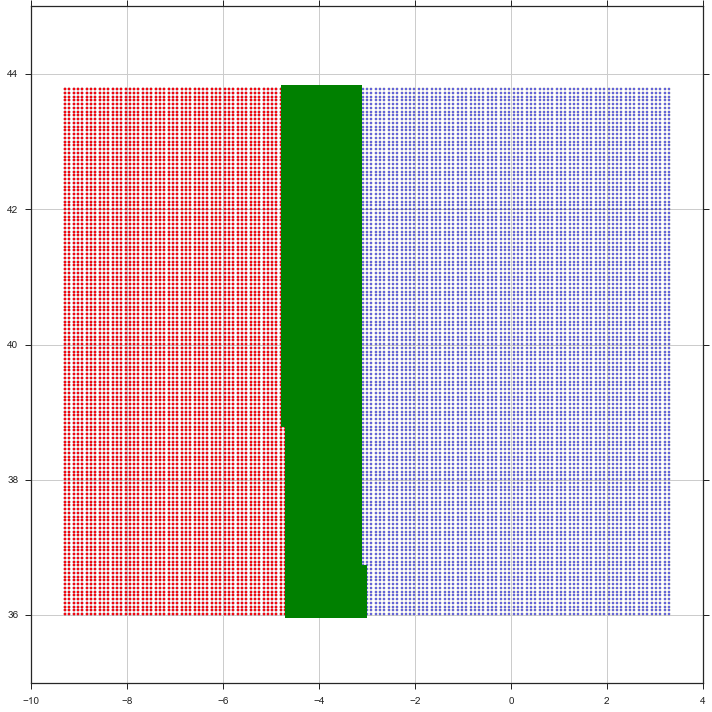

In [44]:
#n = 2500 + 2495
nf = n + 2500
plt.figure(figsize=(10,10))
plt.scatter(xs, ys, marker='.', alpha=0.6)
plt.scatter(xs[:n], ys[:n], marker='.', color='red')
plt.scatter(xs[n:nf], ys[n:nf], marker='s', color='g', s=50, linewidth=0, alpha=1)
plt.gca().grid(True)
plt.tight_layout()

# MONTECARLO

## INFORMACIÓN

In [118]:
g = geocoder.google([41.6894079, -0.8427317], method='reverse')

In [119]:
g.json

{'accuracy': 'ROOFTOP',
 'address': 'Diseminado S Gregorio el Cascajo, 9124, 50059 Zaragoza, Zaragoza, Spain',
 'bbox': {'northeast': [41.6924489802915, -0.842331019708498],
  'southwest': [41.6897510197085, -0.8450289802915021]},
 'city': 'Zaragoza',
 'confidence': 9,
 'country': 'ES',
 'county': 'Z',
 'encoding': 'utf-8',
 'housenumber': '9124',
 'lat': 41.6911,
 'lng': -0.84368,
 'location': '41.6894079, -0.8427317',
 'ok': True,
 'postal': '50059',
 'provider': 'google',
 'quality': 'street_address',
 'state': 'Aragón',
 'status': 'OK',
 'status_code': 200,
 'street': 'Diseminado S Gregorio el Cascajo'}

In [120]:
g.json['county']

'Z'

# MUESTREO

In [62]:
n

4995

In [41]:
# googlemaps
# from collections import defaultdict
# montecarlo = defaultdict(lambda : defaultdict(lambda : defaultdict(tuple)))
montecarlo = dict()
n = 7242
ini = n
fin = n + 2500
counter = 0

In [42]:
ini, fin

(7242, 9742)

In [45]:
ini = 7242
for i, yxs in enumerate(zip(ys[ini:fin], 
                          xs[ini:fin])):
    print('.', end='')

    if i % 100 == 0:
        print(i)

    g = geocoder.google(yxs, method='reverse')
    counter += 1

    try:
        loc = '%s: %s: %s' % (g.json['country'], g.json['state'], g.json['county'])
        print(loc, ini+i)
    except:
        continue

    yx = [list(yxs)]
    montecarlo[loc] = montecarlo.get(loc, yx) + yx
print(counter)

.0
ES: CM: Cdad. Real 7242
.ES: CM: Cdad. Real 7243
.ES: CM: Cdad. Real 7244
.ES: CM: Cdad. Real 7245
.ES: CM: Cdad. Real 7246
.ES: CM: Cdad. Real 7247
.ES: CM: Cdad. Real 7248
..ES: CM: Cdad. Real 7250
.ES: EX: Badajoz 7251
.ES: EX: Badajoz 7252
.ES: CM: TO 7253
.ES: CM: TO 7254
.ES: CM: TO 7255
.ES: CM: TO 7256
.ES: CM: TO 7257
.ES: CM: TO 7258
.ES: CM: TO 7259
.ES: CM: TO 7260
.ES: CM: TO 7261
.ES: CM: TO 7262
.ES: CM: TO 7263
.ES: CM: TO 7264
.ES: CM: TO 7265
.ES: CM: TO 7266
.ES: CM: TO 7267
.ES: CL: Ávila 7268
.ES: CL: Ávila 7269
.ES: CL: Ávila 7270
.ES: CL: Ávila 7271
.ES: CL: Ávila 7272
.ES: CL: Ávila 7273
.ES: CL: Ávila 7274
.ES: CL: Ávila 7275
.ES: CL: Ávila 7276
.ES: CL: Ávila 7277
.ES: CL: Ávila 7278
.ES: CL: Ávila 7279
.ES: CL: Ávila 7280
.ES: CL: Ávila 7281
.ES: CL: Ávila 7282
.ES: CL: Ávila 7283
.ES: CL: VA 7284
.ES: CL: VA 7285
.ES: CL: VA 7286
.ES: CL: VA 7287
.ES: CL: VA 7288
.ES: CL: VA 7289
.ES: CL: VA 7290
.ES: CL: VA 7291
.ES: CL: VA 7292
.ES: CL: VA 7293
.ES: CL:

In [46]:
print(counter)

2500


# MAPA DEL MUESTREO

In [47]:
montecarlo

{'ES: AL: AL': [[36.67899942857143, -3.0922094999999992],
  [36.67899942857143, -3.0922094999999992]],
 'ES: AL: Córdoba': [[37.288985571428569, -4.6210959999999996],
  [37.288985571428569, -4.6210959999999996],
  [37.399892142857141, -4.6210959999999996],
  [37.455345428571427, -4.6210959999999996],
  [37.510798714285713, -4.6210959999999996],
  [37.566251999999999, -4.6210959999999996],
  [37.621705285714285, -4.6210959999999996],
  [37.677158571428571, -4.6210959999999996],
  [37.732611857142857, -4.6210959999999996],
  [37.788065142857143, -4.6210959999999996],
  [37.843518428571429, -4.6210959999999996],
  [37.898971714285715, -4.6210959999999996],
  [37.954425000000001, -4.6210959999999996],
  [38.009878285714287, -4.6210959999999996],
  [38.065331571428572, -4.6210959999999996],
  [38.120784857142858, -4.6210959999999996],
  [38.176238142857144, -4.6210959999999996],
  [38.23169142857143, -4.6210959999999996],
  [38.287144714285716, -4.6210959999999996],
  [38.342597999999995, -

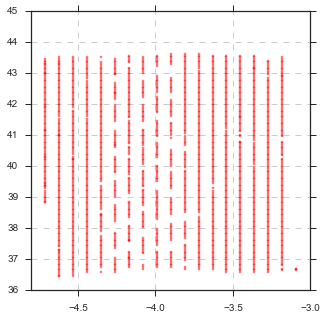

In [48]:
plt.figure(figsize=(5,5))

for k, cs in montecarlo.items():
    x = [c[0] for c in cs]
    y = [c[1] for c in cs]

    if k.startswith('ES'):
        plt.scatter(y, x, color='red', marker='.', alpha=0.5)
    else:
        plt.scatter(y, x, alpha=0.5)

plt.gca().grid(True, linestyle='--')

# ALTERNATIVA

In [49]:
mapquest_api = open('/Users/mmngreco/Documents/mq_api.txt').read()
gmaps_api = open('/Users/mmngreco/Documents/googlemaps_api.txt').read()
geocoder_api = open('/Users/mmngreco/Documents/geocoder_api.txt').read()
mbox_api = open('/Users/mmngreco/Documents/mbox_api.txt').read()

# EXPORTAR DATOS

In [50]:
fname = 'xys.csv'
f = open(fname, 'a')
for key, xys in montecarlo.items():
    for xy in xys:
        print('%s,%s,%s,%s,%s' % (*key.split(': '), *xy), file=f)

f.close()

# COMPROBAMOS LOS DATOS

In [51]:
d = pd.read_csv('xys.csv', header=None)
d.drop_duplicates(inplace=True)

In [52]:
d.columns = ['pais', 'ca', 'prov', 'lat', 'lng']

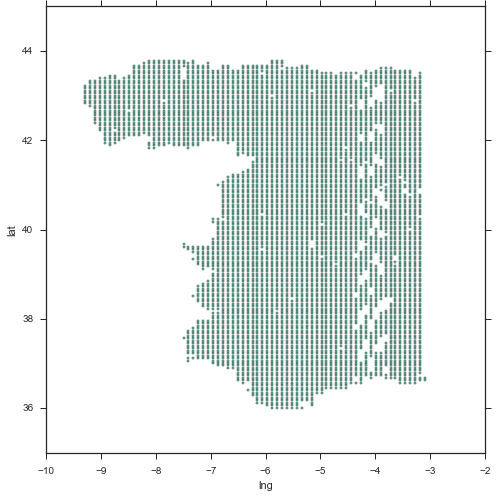

In [53]:
d[d.pais == 'ES'].plot(kind='scatter', x='lng', y='lat', marker='.', figsize=(7,7))
plt.tight_layout()

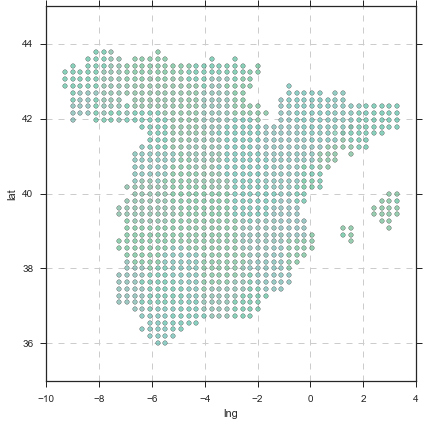

In [151]:
plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1)

xys.dropna(inplace=True)
xys.drop_duplicates(inplace=True)

xys[xys.pais == 'ES'].plot(kind='scatter', x='lng', y='lat', alpha=0.7, ax=ax)

color = sns.color_palette("Set1", 17)
color = sns.color_palette("husl", len(xys[xys.pais == 'ES'].prov.unique()))
#color = sns.color_palette("cubehelix", 17)


#n_color = list(map(int,'9  7 15 14 12 16 10  1  6  8 11 13  0  2  3  4  5'.split()))

for i, region in enumerate(xys[xys.pais == 'ES'].prov.unique()):
#    i = n_color[i]
    xys[xys.prov == region].plot(kind='scatter', 
                                 x='lng', 
                                 y='lat', 
                                 alpha=0.1, 
                                 ax=ax, 
                                 color=color[i], 
                                 marker='o')

plt.xlim(-10,4)
ax.grid(True, linestyle='--')
plt.tight_layout()

In [89]:
ca_iso

,codigo,nombre
0,ES-AN,Andalucía
1,ES-AR,Aragón
2,ES-AS,"Asturias, Principado de"
3,ES-CN,Canarias
4,ES-CB,Cantabria
5,ES-CM,Castilla La Mancha ! Castilla-La Mancha
6,ES-CL,Castilla y León
7,ES-CT,Catalunya (ca) [Cataluña]
8,ES-EX,Extremadura
9,ES-GA,Galicia (gl) [Galicia]


In [82]:
prov_iso

,codigo,nombre,ca
0,ES-C,A Coruña (gl) [La Coruña],GA
1,ES-VI,Alava !Álava Araba (eu),PV
2,ES-AB,Albacete,CM
3,ES-A,Alicante Alacant (ca),VC
4,ES-AL,Almería,AN
5,ES-O,Asturias,AS
6,ES-AV,Avila !Ávila,CL
7,ES-BA,Badajoz,EX
8,ES-PM,Balears (ca) [Baleares],IB
9,ES-B,Barcelona [Barcelona],CT
